# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 41.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator
import seaborn as sns
import datetime as dt

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape
print(f"df_data contains {df_data.shape[0]} rows and {df_data.shape[1]} columns")

df_data contains 4324 rows and 9 columns


In [7]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [8]:
if not df_data.duplicated().values.any():
  print("There are no duplicates in the dataframe")

There are no duplicates in the dataframe


In [9]:
if not df_data.isna().values.any():
  print("There are no NaN values in the dataframe")
else:
  print("There are NaN values in the dataframe")

There are NaN values in the dataframe


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [10]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [11]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


In [12]:
df_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], inplace=True, axis=1)

In [13]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [14]:
# df_data.dropna(inplace=True)

In [15]:
# if not df_data.isna().values.any():
#   print("There are no leftover NaN values")

## Descriptive Statistics

In [16]:
df_data['Price'] = df_data['Price'].str.replace(',', '').astype(float)

In [17]:
df_data.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


In [18]:
df_data['Price'].max()

5000.0

In [19]:
df_data['Price'].min()

5.3

In [20]:
df_data['Price'].sort_values(ascending=False)

1916   5,000.00
2000   5,000.00
3545   1,160.00
3603   1,160.00
3475   1,160.00
         ...   
4319        NaN
4320        NaN
4321        NaN
4322        NaN
4323        NaN
Name: Price, Length: 4324, dtype: float64

In [21]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Date            4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Rocket_Status   4324 non-null   object 
 5   Price           964 non-null    float64
 6   Mission_Status  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


In [22]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Date            4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Rocket_Status   4324 non-null   object 
 5   Price           964 non-null    float64
 6   Mission_Status  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


In [23]:
df_data.sort_values(by='Price')

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
102,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Thu Sep 19, 2019 06:42 UTC",Long March 11 | Zhuhai-1 Group 03,StatusActive,5.30,Success
281,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jan 19, 2018 04:12 UTC","Long March 11 | Jilin-1 07, 08 & Others",StatusActive,5.30,Success
26,CASC,"Xichang Satellite Launch Center, China","Fri May 29, 2020 20:13 UTC",Long March 11 | XJS-G and XJS-H,StatusActive,5.30,Success
176,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Dec 21, 2018 23:51 UTC",Long March 11 | Hongyun-1,StatusActive,5.30,Success
487,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Sep 25, 2015",Long March 11 | Pujian 1 & Others,StatusActive,5.30,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [24]:
fig = px.bar(df_data, x='Organisation', color='Organisation')
fig.update_layout(yaxis_title = "Number of Space Missions", plot_bgcolor="#fff")
fig.update_traces(dict(marker_line_width=0))
fig.show()

In [25]:
df_data.Organisation[df_data.Organisation == "NASA"]

682     NASA
687     NASA
695     NASA
726     NASA
733     NASA
        ... 
4243    NASA
4257    NASA
4280    NASA
4296    NASA
4299    NASA
Name: Organisation, Length: 203, dtype: object

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [26]:
df_data['Rocket_Status'].value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [27]:
df_data.Mission_Status.value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [28]:
df_data.head(1)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success


In [29]:
df_data['Price'].isna().any()

True

In [30]:
price_df = df_data.copy()
price_df.dropna(subset=['Price'], inplace=True)

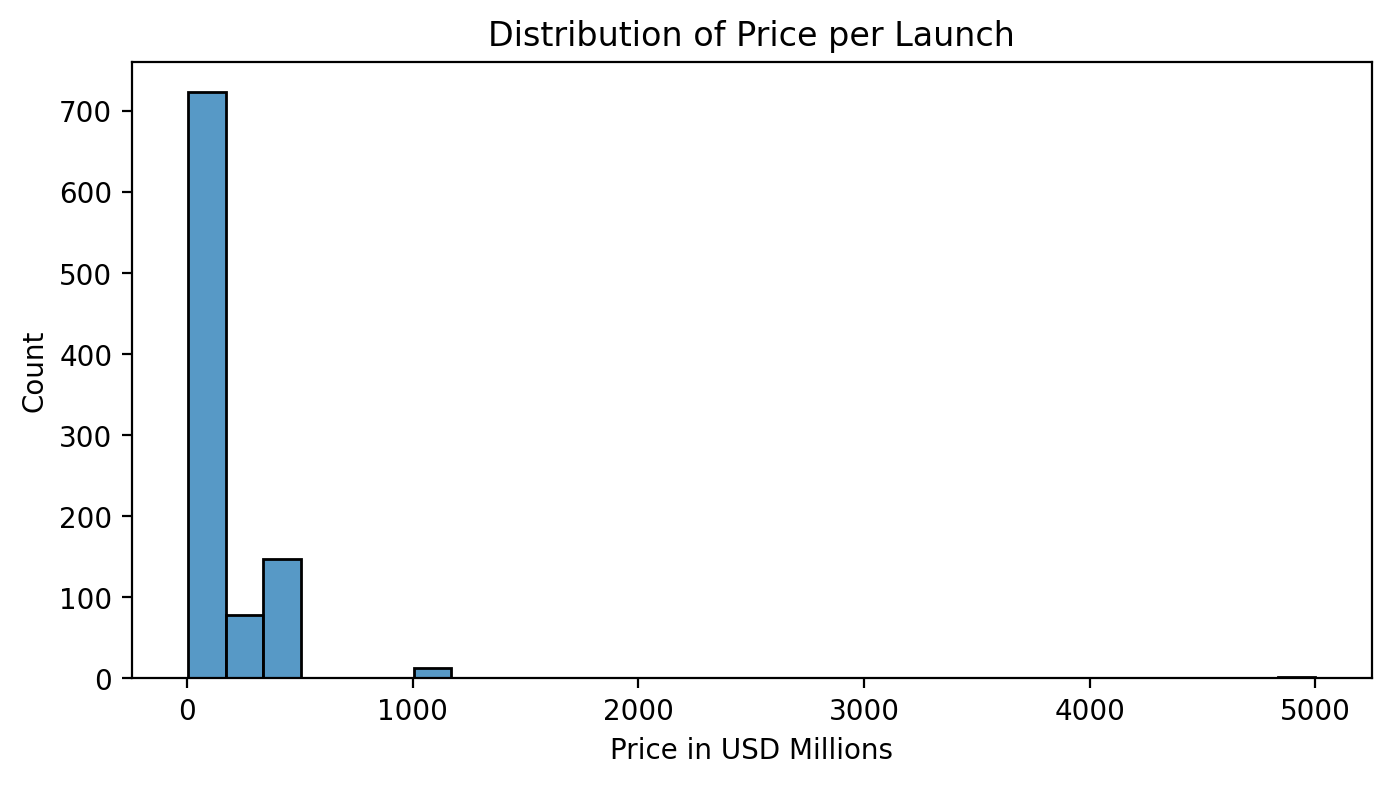

In [31]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(price_df, x=price_df.Price, bins=30)
plt.xlabel('Price in USD Millions')
plt.title('Distribution of Price per Launch')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [32]:
df_data['Location'].unique()

array(['LC-39A, Kennedy Space Center, Florida, USA',
       'Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China',
       'Pad A, Boca Chica, Texas, USA',
       'Site 200/39, Baikonur Cosmodrome, Kazakhstan',
       'SLC-41, Cape Canaveral AFS, Florida, USA',
       'LC-9, Taiyuan Satellite Launch Center, China',
       'Site 31/6, Baikonur Cosmodrome, Kazakhstan',
       'LC-101, Wenchang Satellite Launch Center, China',
       'SLC-40, Cape Canaveral AFS, Florida, USA',
       'LA-Y1, Tanegashima Space Center, Japan',
       'LP-0B, Wallops Flight Facility, Virginia, USA',
       'Site 95, Jiuquan Satellite Launch Center, China',
       'LC-3, Xichang Satellite Launch Center, China',
       'Pad 1, Palmachim Airbase, Israel',
       'Rocket Lab LC-1A, M?\x81hia Peninsula, New Zealand',
       'LC-2, Xichang Satellite Launch Center, China',
       'Xichang Satellite Launch Center, China',
       'Cosmic Girl, Mojave Air and Space Port, California, USA',
       'Site 43/4, Plese

In [33]:
new_df = df_data.copy()
replacements = {
    "Russia": "Russian Federation",
    "Yellow Sea": "China",
    "Pacific Missile Range Facility": "USA",
    "Gran Canaria": "USA",
    "New Mexico": "USA",
    "Shahrud Missile Test Site": "Iran",
    "Barents Sea": "Russian Federation"
}

In [34]:
new_df['Country'] = new_df['Location']
new_df.Country.unique()

array(['LC-39A, Kennedy Space Center, Florida, USA',
       'Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China',
       'Pad A, Boca Chica, Texas, USA',
       'Site 200/39, Baikonur Cosmodrome, Kazakhstan',
       'SLC-41, Cape Canaveral AFS, Florida, USA',
       'LC-9, Taiyuan Satellite Launch Center, China',
       'Site 31/6, Baikonur Cosmodrome, Kazakhstan',
       'LC-101, Wenchang Satellite Launch Center, China',
       'SLC-40, Cape Canaveral AFS, Florida, USA',
       'LA-Y1, Tanegashima Space Center, Japan',
       'LP-0B, Wallops Flight Facility, Virginia, USA',
       'Site 95, Jiuquan Satellite Launch Center, China',
       'LC-3, Xichang Satellite Launch Center, China',
       'Pad 1, Palmachim Airbase, Israel',
       'Rocket Lab LC-1A, M?\x81hia Peninsula, New Zealand',
       'LC-2, Xichang Satellite Launch Center, China',
       'Xichang Satellite Launch Center, China',
       'Cosmic Girl, Mojave Air and Space Port, California, USA',
       'Site 43/4, Plese

In [35]:
for old_location, new_location in replacements.items():
  new_df['Country'] = new_df['Country'].str.replace(old_location, new_location)

new_df['Country'].unique()

array(['LC-39A, Kennedy Space Center, Florida, USA',
       'Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China',
       'Pad A, Boca Chica, Texas, USA',
       'Site 200/39, Baikonur Cosmodrome, Kazakhstan',
       'SLC-41, Cape Canaveral AFS, Florida, USA',
       'LC-9, Taiyuan Satellite Launch Center, China',
       'Site 31/6, Baikonur Cosmodrome, Kazakhstan',
       'LC-101, Wenchang Satellite Launch Center, China',
       'SLC-40, Cape Canaveral AFS, Florida, USA',
       'LA-Y1, Tanegashima Space Center, Japan',
       'LP-0B, Wallops Flight Facility, Virginia, USA',
       'Site 95, Jiuquan Satellite Launch Center, China',
       'LC-3, Xichang Satellite Launch Center, China',
       'Pad 1, Palmachim Airbase, Israel',
       'Rocket Lab LC-1A, M?\x81hia Peninsula, New Zealand',
       'LC-2, Xichang Satellite Launch Center, China',
       'Xichang Satellite Launch Center, China',
       'Cosmic Girl, Mojave Air and Space Port, California, USA',
       'Site 43/4, Plese

In [36]:
new_df.loc[new_df.Country == "Tai Rui Barge, China"]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
133,CASC,"Tai Rui Barge, Yellow Sea","Wed Jun 05, 2019 04:06 UTC",Long March 11H | Jilin-1 & Others,StatusActive,5.30,Success,"Tai Rui Barge, China"


In [37]:
new_df['Country'] = new_df['Country'].str.split(", ").str.get(-1)
new_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


In [38]:
print(countries.get("USA"))

Country(name='United States of America', alpha2='US', alpha3='USA', numeric='840', apolitical_name='United States of America')


In [39]:
for i, country in enumerate(new_df['Country']):
    if country == 'Iran':
        new_df.at[i, 'Country_ISO'] = "IR"
    elif country == 'North Korea':
        new_df.at[i, 'Country_ISO'] = "KP"
    elif country == 'Pacific Ocean':
        new_df.at[i, 'Country_ISO'] = None
    elif country == 'South Korea':
        new_df.at[i, 'Country_ISO'] = "KR"
    else:
        new_df.at[i, 'Country_ISO'] = countries.get(country)[2]
new_df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ


In [40]:
for c in countries:
       print(c)

Country(name='Afghanistan', alpha2='AF', alpha3='AFG', numeric='004', apolitical_name='Afghanistan')
Country(name='Åland Islands', alpha2='AX', alpha3='ALA', numeric='248', apolitical_name='Åland Islands')
Country(name='Albania', alpha2='AL', alpha3='ALB', numeric='008', apolitical_name='Albania')
Country(name='Algeria', alpha2='DZ', alpha3='DZA', numeric='012', apolitical_name='Algeria')
Country(name='American Samoa', alpha2='AS', alpha3='ASM', numeric='016', apolitical_name='American Samoa')
Country(name='Andorra', alpha2='AD', alpha3='AND', numeric='020', apolitical_name='Andorra')
Country(name='Angola', alpha2='AO', alpha3='AGO', numeric='024', apolitical_name='Angola')
Country(name='Anguilla', alpha2='AI', alpha3='AIA', numeric='660', apolitical_name='Anguilla')
Country(name='Antarctica', alpha2='AQ', alpha3='ATA', numeric='010', apolitical_name='Antarctica')
Country(name='Antigua and Barbuda', alpha2='AG', alpha3='ATG', numeric='028', apolitical_name='Antigua and Barbuda')
Countr

In [41]:
df_launches = new_df.groupby(['Country_ISO', 'Country'], as_index=False).agg({'Mission_Status': pd.Series.count})
df_launches.rename(columns={'Mission_Status': 'Count'}, inplace=True)
df_launches.sort_values('Country_ISO', inplace=True)
df_launches

,Country_ISO,Country,Count
0,AUS,Australia,6
1,BRA,Brazil,3
2,CHN,China,269
3,FRA,France,303
4,IND,India,76
5,IR,Iran,14
6,ISR,Israel,11
7,JPN,Japan,126
8,KAZ,Kazakhstan,701
9,KEN,Kenya,9


In [42]:
fig = px.choropleth(df_launches, locations="Country_ISO", color='Count', hover_name='Country', color_continuous_scale="matter")
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [43]:
# df_failures = new_df.groupby(['Country_ISO', 'Country'], as_index=False).agg('Mission_Status' == "Failure")
df_failures = new_df[new_df['Mission_Status'] == "Failure"]
df_failures = df_failures.groupby(['Country_ISO', 'Country'], as_index=False).agg({'Mission_Status': pd.Series.count})
df_failures = df_failures.rename(columns={'Mission_Status': 'Number of Failures'})
df_failures

,Country_ISO,Country,Number of Failures
0,AUS,Australia,3
1,BRA,Brazil,2
2,CHN,China,19
3,FRA,France,13
4,IND,India,8
5,IR,Iran,8
6,ISR,Israel,2
7,JPN,Japan,10
8,KAZ,Kazakhstan,72
9,KP,North Korea,3


In [44]:
fig = px.choropleth(df_failures, locations="Country_ISO", hover_name="Country", color="Number of Failures", color_continuous_scale="magma")
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [45]:
df_missions = new_df.groupby(['Country', 'Organisation', "Mission_Status"], as_index=False).agg({'Date': 'count'})
df_missions = df_missions.rename(columns={'Date': 'Mission Count'})
most_missions = df_missions.sort_values(by='Mission Count', ascending=False)
most_missions

,Country,Organisation,Mission_Status,Mission Count
81,Russian Federation,RVSN USSR,Success,1119
58,Kazakhstan,RVSN USSR,Success,495
19,France,Arianespace,Success,267
9,China,CASC,Success,231
105,USA,General Dynamics,Success,203
...,...,...,...,...
77,Russian Federation,MITT,Failure,1
82,Russian Federation,Roscosmos,Failure,1
84,Russian Federation,SRC,Failure,1
89,Russian Federation,Yuzhmash,Success,1


In [46]:
sunburst = px.sunburst(most_missions, path=['Country', 'Organisation', 'Mission_Status'], values='Mission Count')
sunburst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [47]:
mission_prices = price_df.groupby('Organisation', as_index=False).agg({'Price': 'sum'})
total_prices = mission_prices.sort_values(by='Price', ascending=False)
total_prices

,Organisation,Price
14,NASA,"76,280.00"
0,Arianespace,"16,345.00"
21,ULA,"14,798.00"
16,RVSN USSR,"10,000.00"
2,CASC,"6,340.26"
20,SpaceX,"5,444.00"
15,Northrop,"3,930.00"
12,MHI,"3,532.50"
8,ISRO,"2,177.00"
22,US Air Force,"1,550.92"


In [48]:
new_df[new_df['Organisation'] == "Virgin Orbit"]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_ISO
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...","Mon May 25, 2020 19:50 UTC",LauncherOne | Demo Flight,StatusActive,12.00,Failure,USA,USA


# Analyse the Amount of Money Spent by Organisation per Launch

In [49]:
org_expenditure = price_df.groupby('Organisation', as_index=False).agg({'Price': 'mean'})
biggest_spenders = org_expenditure.sort_values(by='Price', ascending=False)
biggest_spenders

,Organisation,Price
16,RVSN USSR,"5,000.00"
14,NASA,511.95
1,Boeing,177.29
0,Arianespace,170.26
21,ULA,151.00
7,ILS,101.54
12,MHI,95.47
13,Martin Marietta,80.16
22,US Air Force,59.65
9,JAXA,56.00


In [50]:
biggest_spenders.describe()

,Price
count,25.00
mean,276.10
std,989.35
min,7.50
25%,32.49
50%,47.35
75%,95.47
max,"5,000.00"


# Chart the Number of Launches per Year

In [51]:
new_df.Date.head(1)

0    Fri Aug 07, 2020 05:12 UTC
Name: Date, dtype: object

In [52]:
df_dates = new_df.copy()

In [53]:
df_dates.Date = pd.to_datetime(df_dates.Date, utc='True').dt.date

In [54]:
df_dates['Year'] = pd.to_datetime(df_dates.Date, utc='True').dt.year

In [55]:
df_dates = df_dates[['Organisation', 'Location', 'Date', 'Year', 'Detail', 'Rocket_Status', 'Price', 'Mission_Status', 'Country', 'Country_ISO']]

In [56]:
df_dates.head(1)

,Organisation,Location,Date,Year,Detail,Rocket_Status,Price,Mission_Status,Country,Country_ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,2020,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA


In [57]:
launches_per_year = df_dates.groupby('Year').agg({'Mission_Status': 'count'})

In [58]:
launches_per_year

,Mission_Status
Year,
1957,3
1958,28
1959,20
1960,39
1961,52
...,...
2016,90
2017,92
2018,117


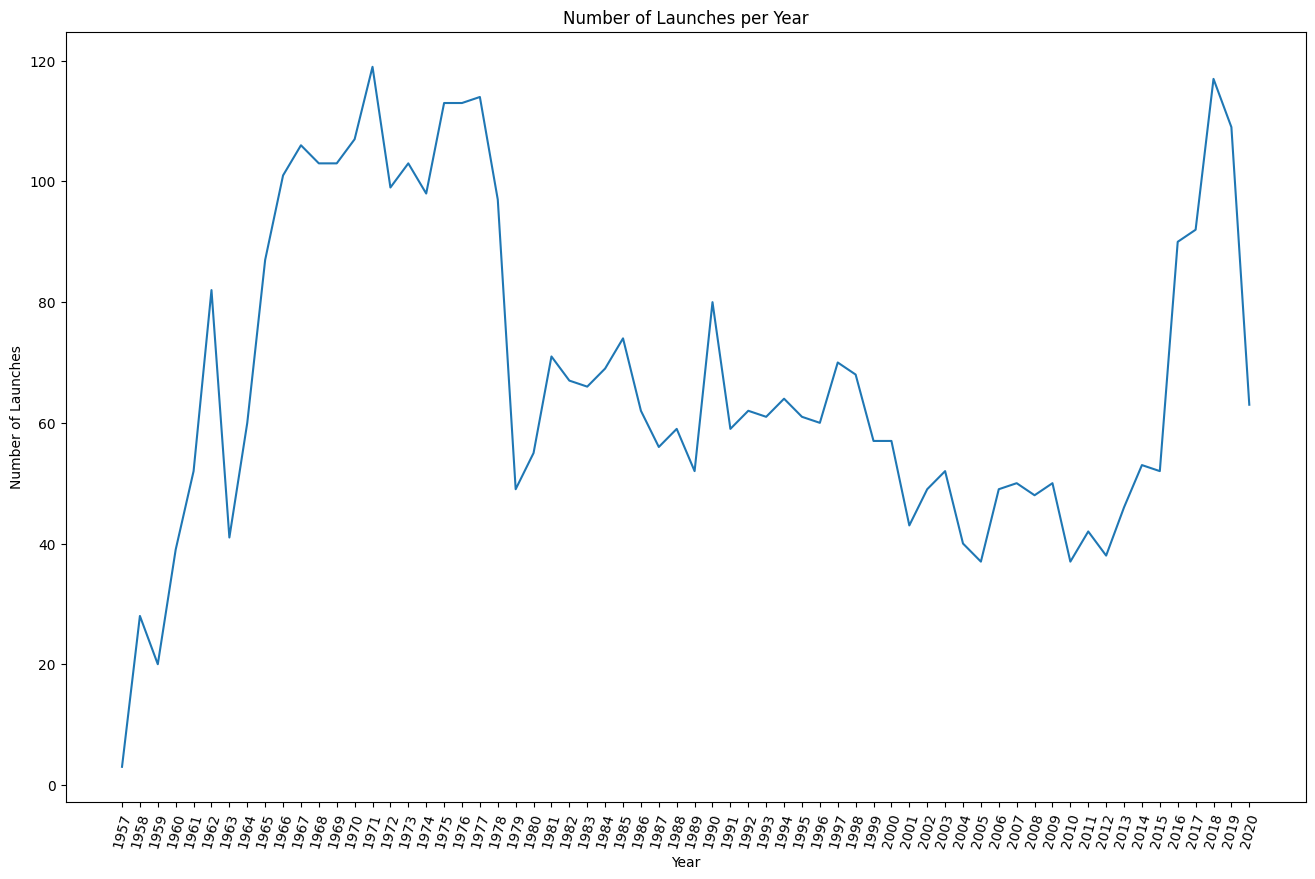

In [59]:
plt.figure(figsize=(16,10))
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.title('Number of Launches per Year')
plt.xticks(labels=launches_per_year.index, ticks=launches_per_year.index, rotation=75)
plt.plot(launches_per_year.index, launches_per_year.Mission_Status)

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [60]:
df_dates['Month'] = pd.to_datetime(df_dates['Date'], utc=True).dt.month
df_dates = df_dates[['Organisation', 'Location', 'Date', 'Month', 'Year', 'Detail', 'Rocket_Status', 'Price', 'Mission_Status', 'Country', 'Country_ISO']]
df_dates

,Organisation,Location,Date,Month,Year,Detail,Rocket_Status,Price,Mission_Status,Country,Country_ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,8,2020,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,8,2020,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,8,2020,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,7,2020,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,7,2020,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,2,1958,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,2,1958,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,12,1957,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,11,1957,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ


In [61]:
top_months = df_dates.groupby('Month').agg({'Mission_Status': 'count'})
top_months = top_months.sort_values(by='Month', ascending=False)
number_one_month = top_months['Mission_Status'].idxmax()
formatted_month = pd.to_datetime(f'1972-{number_one_month}-01')  # Any year and day would work, the goal was just to create a valid date
formatted_month = formatted_month.strftime('%B')
print(f'The month that has had the most launches among the years was {formatted_month}')

The month that has had the most launches among the years was December


In [62]:
top_months

,Mission_Status
Month,
12,450
11,336
10,381
9,365
8,373
7,351
6,402
5,326
4,383


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [63]:
launch_prices = df_dates.groupby('Year', as_index=False).agg({'Price': 'mean'})
launch_prices = launch_prices.sort_values(by='Year')
launch_prices.dropna(inplace=True)

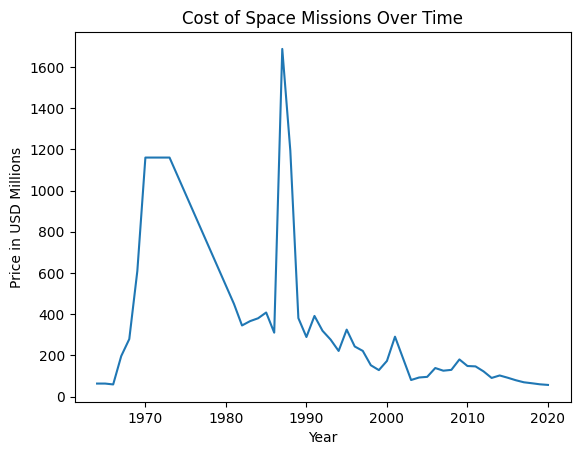

In [64]:
plt.plot(launch_prices.Year, launch_prices.Price)
plt.ylabel('Price in USD Millions')
plt.xlabel('Year')
plt.title('Cost of Space Missions Over Time')
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [65]:
top_10_org = df_dates.groupby('Organisation', as_index=False).agg({'Mission_Status': 'count'})
top_10_org = top_10_org.sort_values(by='Mission_Status', ascending=False)
top_10_org = top_10_org.head(10)
top_10_org

,Organisation,Mission_Status
40,RVSN USSR,1777
3,Arianespace,279
17,General Dynamics,251
7,CASC,251
35,NASA,203
52,VKS RF,201
49,US Air Force,161
48,ULA,140
6,Boeing,136
34,Martin Marietta,114


In [66]:
launches_over_time = df_dates.groupby(['Organisation', 'Year'], as_index=False).agg({'Mission_Status': 'count'})
launches_over_time['top_10'] = launches_over_time['Organisation'].isin(top_10_org['Organisation'])
launches_over_time.drop(launches_over_time[launches_over_time['top_10'] == False].index, axis=0, inplace=True)
launches_over_time.rename(columns={'Mission_Status': 'Launches'}, inplace=True)
launches_over_time

,Organisation,Year,Launches,top_10
12,Arianespace,1984,3,True
13,Arianespace,1985,4,True
14,Arianespace,1986,3,True
15,Arianespace,1987,2,True
16,Arianespace,1988,6,True
...,...,...,...,...
654,VKS RF,2016,4,True
655,VKS RF,2017,6,True
656,VKS RF,2018,5,True
657,VKS RF,2019,8,True


In [67]:
l_chart = px.line(launches_over_time, x='Year', y='Launches', color='Organisation', hover_name='Organisation')
l_chart.update_layout(title='Number of Launches Over Time by Top 10 Organisations', xaxis_title = 'Year', yaxis_title='Number of Launches')
l_chart.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [68]:
cold_war = df_dates.copy()
cold_war = cold_war[cold_war['Year'] <= 1991]
cold_war = cold_war.sort_values(by='Year', ascending=False)
cold_war

,Organisation,Location,Date,Month,Year,Detail,Rocket_Status,Price,Mission_Status,Country,Country_ISO
1717,CASC,"LC-3, Xichang Satellite Launch Center, China",1991-12-28,12,1991,Long March 3 | DFH-2A-T5,StatusRetired,NaN,Partial Failure,China,CHN
1747,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia",1991-06-18,6,1991,Molniya-M /Block ML | Molniya-1 n†­149,StatusRetired,NaN,Success,Russian Federation,RUS
1749,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-06-11,6,1991,Cosmos-3M (11K65M) | Cosmos 2150,StatusRetired,NaN,Success,Russian Federation,RUS
1750,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1991-06-05,6,1991,Space Shuttle Columbia | STS-40,StatusRetired,450.00,Success,USA,USA
1751,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-06-04,6,1991,Tsyklon-3 | Okean 3,StatusRetired,NaN,Success,Russian Federation,RUS
...,...,...,...,...,...,...,...,...,...,...,...
4294,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958-12-06,12,1958,Juno II | Pioneer 3,StatusRetired,NaN,Partial Failure,USA,USA
4293,US Air Force,"LC-11, Cape Canaveral AFS, Florida, USA",1958-12-18,12,1958,SM-65B Atlas | SCORE,StatusRetired,NaN,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,12,1957,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,11,1957,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [69]:
players = ["USA", "Russian Federation", "Kazakhstan"]

In [70]:
df_cold_war = cold_war.copy()
df_cold_war['Is_Player'] = df_cold_war['Country'].isin(players)
df_cold_war.drop(df_cold_war[df_cold_war['Is_Player'] == False].index, axis=0, inplace=True)
df_cold_war = df_cold_war.groupby('Country', as_index=False).agg({'Mission_Status': 'count'})
df_cold_war.rename(columns={'Mission_Status': 'Number of Launches'}, inplace=True)
df_cold_war

,Country,Number of Launches
0,Kazakhstan,582
1,Russian Federation,1188
2,USA,662


In [71]:
merged_parties = df_cold_war.copy()
merged_parties.loc[merged_parties.Country.isin(['Kazakhstan', 'Russian Federation']), 'Country'] = 'USSR'
merged_parties = merged_parties.groupby('Country', as_index=False).agg({'Number of Launches': 'sum'}).sort_values(by='Number of Launches', ascending=False)
merged_parties

,Country,Number of Launches
1,USSR,1770
0,USA,662


In [72]:
fig = px.pie(merged_parties, values='Number of Launches', names=merged_parties.Country, title='Share of Launches per Country', hole=.3)
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [88]:
two_powers = cold_war.copy()

In [90]:
two_powers['Is_Player'] = two_powers['Country'].isin(players)
two_powers.drop(two_powers[two_powers['Is_Player'] == False].index, axis=0, inplace=True)
two_powers.loc[two_powers.Country.isin(['Kazakhstan', 'Russian Federation']), 'Country'] = 'USSR'


,Organisation,Location,Date,Month,Year,Detail,Rocket_Status,Price,Mission_Status,Country,Country_ISO,Is_Player
1747,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia",1991-06-18,6,1991,Molniya-M /Block ML | Molniya-1 n†­149,StatusRetired,NaN,Success,USSR,RUS,True
1749,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-06-11,6,1991,Cosmos-3M (11K65M) | Cosmos 2150,StatusRetired,NaN,Success,USSR,RUS,True
1750,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1991-06-05,6,1991,Space Shuttle Columbia | STS-40,StatusRetired,450.00,Success,USA,USA,True
1751,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-06-04,6,1991,Tsyklon-3 | Okean 3,StatusRetired,NaN,Success,USSR,RUS,True
1752,Boeing,"SLC-17B, Cape Canaveral AFS, Florida, USA",1991-05-29,5,1991,Delta II 7925 | Aurora 2,StatusRetired,NaN,Success,USA,USA,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4294,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958-12-06,12,1958,Juno II | Pioneer 3,StatusRetired,NaN,Partial Failure,USA,USA,True
4293,US Air Force,"LC-11, Cape Canaveral AFS, Florida, USA",1958-12-18,12,1958,SM-65B Atlas | SCORE,StatusRetired,NaN,Success,USA,USA,True
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,12,1957,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,True
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,11,1957,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,USSR,KAZ,True


In [91]:
two_powers = two_powers.groupby(['Country', 'Year'], as_index=False).agg({'Mission_Status': 'count'}).sort_values(by='Year')
two_powers = two_powers.rename(columns={'Mission_Status': 'Number of Launches'})
two_powers

,Country,Year,Number of Launches
0,USA,1957,1
35,USSR,1957,2
1,USA,1958,23
36,USSR,1958,5
2,USA,1959,16
...,...,...,...
32,USA,1989,16
68,USSR,1990,37
33,USA,1990,26
34,USA,1991,18


In [92]:
war_chart = px.line(two_powers, x='Year', y='Number of Launches', color='Country', hover_name='Country')
war_chart.update_layout(title='Yearly Launches During Cold War Between Enemies', xaxis_title = 'Year', yaxis_title='Number of Launches')
war_chart.show()

## Chart the Total Number of Mission Failures Year on Year.

In [97]:
yearly_failures = df_dates[df_dates['Mission_Status'] == "Failure"]
yearly_failures = yearly_failures.groupby(['Country', 'Year'], as_index=False).agg({'Mission_Status': 'count'})
yearly_failures.rename(columns={'Mission_Status': 'Launch Failures'}, inplace=True)
yearly_failures = yearly_failures.sort_values(by='Year')
yearly_failures

,Country,Year,Launch Failures
122,USA,1957,1
54,Kazakhstan,1958,4
123,USA,1958,16
55,Kazakhstan,1959,1
124,USA,1959,8
...,...,...,...
17,China,2019,2
84,New Zealand,2020,1
18,China,2020,3
42,Iran,2020,1


In [101]:
failure_chart = px.line(yearly_failures, x='Year', y='Launch Failures')
failure_chart.update_traces(line={'color': 'red'})
failure_chart.update_layout(title='Number of Failures Year on Year')
failure_chart.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [139]:
failure_pct = df_dates.copy()
failure_pct = failure_pct.groupby(['Country', 'Year', 'Mission_Status'], as_index=False).agg({'Date': 'count'})
failure_pct = failure_pct.sort_values(by='Year')
failure_pct.rename(columns={'Date': 'Mission_Count'}, inplace=True)
# failure_pct['Failure Percentage'] = failure_pct[]
failure_pct.head(1)

,Country,Year,Mission_Status,Mission_Count
250,Kazakhstan,1957,Success,2


In [138]:
mission_counts = df_dates.copy()
mission_counts = mission_counts.groupby(['Country', 'Year'], as_index=False).agg({'Mission_Status': 'count'})
mission_counts.rename(columns={'Mission_Status': 'Total_Missions'}, inplace=True)
mission_counts.head(1)


,Country,Year,Total_Missions
0,Australia,1967,1


In [142]:
new_failure_t = failure_pct.copy()
new_failure_t['id'] = new_failure_t['Country'] + new_failure_t['Year'].astype(str)
new_failure_t

,Country,Year,Mission_Status,Mission_Count,id
250,Kazakhstan,1957,Success,2,Kazakhstan1957
501,USA,1957,Failure,1,USA1957
252,Kazakhstan,1958,Success,1,Kazakhstan1958
502,USA,1958,Failure,16,USA1958
503,USA,1958,Partial Failure,2,USA1958
...,...,...,...,...,...
71,China,2020,Success,19,China2020
355,Kazakhstan,2020,Success,6,Kazakhstan2020
70,China,2020,Failure,3,China2020
630,USA,2020,Failure,1,USA2020


In [144]:
new_counts_t = mission_counts.copy()
new_counts_t['id'] = new_counts_t['Country'] + new_counts_t['Year'].astype(str)
new_counts_t

,Country,Year,Total_Missions,id
0,Australia,1967,1,Australia1967
1,Australia,1968,1,Australia1968
2,Australia,1969,1,Australia1969
3,Australia,1970,2,Australia1970
4,Australia,1971,1,Australia1971
...,...,...,...,...
422,USA,2016,27,USA2016
423,USA,2017,30,USA2017
424,USA,2018,34,USA2018
425,USA,2019,27,USA2019


In [150]:
status_df = pd.merge(new_failure_t, new_counts_t, on='id')
status_df.head(1)

,Country_x,Year_x,Mission_Status,Mission_Count,id,Country_y,Year_y,Total_Missions
0,Kazakhstan,1957,Success,2,Kazakhstan1957,Kazakhstan,1957,2


In [152]:
status_df['Status_Pct'] = status_df['Mission_Count'].divide(status_df['Total_Missions'])
status_df

,Country_x,Year_x,Mission_Status,Mission_Count,id,Country_y,Year_y,Total_Missions,Status_Pct
0,Kazakhstan,1957,Success,2,Kazakhstan1957,Kazakhstan,1957,2,1.00
1,USA,1957,Failure,1,USA1957,USA,1957,1,1.00
2,Kazakhstan,1958,Success,1,Kazakhstan1958,Kazakhstan,1958,5,0.20
3,Kazakhstan,1958,Failure,4,Kazakhstan1958,Kazakhstan,1958,5,0.80
4,USA,1958,Failure,16,USA1958,USA,1958,23,0.70
...,...,...,...,...,...,...,...,...,...
627,China,2020,Success,19,China2020,China,2020,22,0.86
628,China,2020,Failure,3,China2020,China,2020,22,0.14
629,Kazakhstan,2020,Success,6,Kazakhstan2020,Kazakhstan,2020,6,1.00
630,USA,2020,Failure,1,USA2020,USA,2020,21,0.05


In [156]:
# failure_pct = failure_pct.groupby(['Country', 'Year', 'Mission_Status'], as_index=False).agg({'Date': 'count'})
failure_pct

,Country,Year,Mission_Status,Mission_Count
250,Kazakhstan,1957,Success,2
501,USA,1957,Failure,1
252,Kazakhstan,1958,Success,1
502,USA,1958,Failure,16
503,USA,1958,Partial Failure,2
...,...,...,...,...
71,China,2020,Success,19
355,Kazakhstan,2020,Success,6
70,China,2020,Failure,3
630,USA,2020,Failure,1


In [174]:
status_df.head()

,Country_x,Year_x,Mission_Status,Mission_Count,id,Country_y,Year_y,Total_Missions,Status_Pct
0,Kazakhstan,1957,Success,2,Kazakhstan1957,Kazakhstan,1957,2,1.00
1,USA,1957,Failure,1,USA1957,USA,1957,1,1.00
2,Kazakhstan,1958,Success,1,Kazakhstan1958,Kazakhstan,1958,5,0.20
3,Kazakhstan,1958,Failure,4,Kazakhstan1958,Kazakhstan,1958,5,0.80
4,USA,1958,Failure,16,USA1958,USA,1958,23,0.70
...,...,...,...,...,...,...,...,...,...
627,China,2020,Success,19,China2020,China,2020,22,0.86
628,China,2020,Failure,3,China2020,China,2020,22,0.14
629,Kazakhstan,2020,Success,6,Kazakhstan2020,Kazakhstan,2020,6,1.00
630,USA,2020,Failure,1,USA2020,USA,2020,21,0.05


In [195]:
failure_share = status_df.count()
# failure_share = status_df['Mission_Status'].isin(['Failiure', 'Partial Failure', 'Prelaunch Failure'])
failure_share = failure_share.sort_values(by='Year_x')
failure_share

,Country_x,Year_x,Mission_Status,Status_Pct,Mission_Count,id,Country_y,Year_y,Total_Missions
250,Kazakhstan,1957,Success,1.00,1,1,1,1,1
501,USA,1957,Failure,1.00,1,1,1,1,1
252,Kazakhstan,1958,Success,0.20,1,1,1,1,1
502,USA,1958,Failure,0.70,1,1,1,1,1
503,USA,1958,Partial Failure,0.09,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
71,China,2020,Success,0.86,1,1,1,1,1
355,Kazakhstan,2020,Success,1.00,1,1,1,1,1
70,China,2020,Failure,0.14,1,1,1,1,1
630,USA,2020,Failure,0.05,1,1,1,1,1


In [197]:
failure_pct['Status_Pct'] = failure_share['Status_Pct']

In [200]:
failure_pct_only = failure_pct[failure_pct['Mission_Status'] != "Success"]
failure_pct_only

,Country,Year,Mission_Status,Mission_Count,Status_Pct
501,USA,1957,Failure,1,1.00
502,USA,1958,Failure,16,0.70
503,USA,1958,Partial Failure,2,0.09
251,Kazakhstan,1958,Failure,4,0.80
253,Kazakhstan,1959,Failure,1,0.25
...,...,...,...,...,...
131,France,2019,Failure,1,0.11
179,Iran,2020,Failure,1,0.50
366,New Zealand,2020,Failure,1,0.33
70,China,2020,Failure,3,0.14


In [204]:
# At this point I realized I didn't actually need the countries
# (the challenge was just the failure percentage over time), so I adapted:
failures_per_year = failure_pct_only.reset_index()

In [207]:
failures_per_year = failures_per_year.groupby('Year', as_index=False).agg({'Status_Pct': 'mean'})
failures_per_year = failures_per_year.sort_values(by='Year')
failures_per_year

,Year,Status_Pct
0,1957,1.00
1,1958,0.53
2,1959,0.28
3,1960,0.57
4,1961,0.41
...,...,...
59,2016,0.05
60,2017,0.34
61,2018,0.06
62,2019,0.21


In [211]:
failure_chart = px.line(failures_per_year, x='Year', y='Status_Pct')
failure_chart.update_traces(line={'color': 'purple'})
failure_chart.update_layout(title='% of Failures Over Time', yaxis_title='Failure Rate')
failure_chart.update_yaxes(tickformat='.0%')
failure_chart.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [222]:
total_launches = status_df.agg({'Mission_Count': 'sum'}).reset_index()
total_launches = total_launches.sort_values(by='Year_x')
total_launches

,index,Country_x,Year_x,Mission_Status,Status_Pct,Mission_Count
250,250,Kazakhstan,1957,Success,1.00,2
501,501,USA,1957,Failure,1.00,1
252,252,Kazakhstan,1958,Success,0.20,1
502,502,USA,1958,Failure,0.70,16
503,503,USA,1958,Partial Failure,0.09,2
...,...,...,...,...,...,...
71,71,China,2020,Success,0.86,19
355,355,Kazakhstan,2020,Success,1.00,6
70,70,China,2020,Failure,0.14,3
630,630,USA,2020,Failure,0.05,1


In [246]:
launches_per_country = total_launches.groupby(['Country_x', 'Year_x'], as_index=False).agg({'Mission_Count': 'sum'})
launches_per_country = launches_per_country.sort_values(by='Year_x')
launches_per_country.head(5)

,Country_x,Year_x,Mission_Count
207,Kazakhstan,1957,2
363,USA,1957,1
208,Kazakhstan,1958,5
364,USA,1958,23
209,Kazakhstan,1959,4


In [247]:
cumulative_launches = launches_per_country.groupby(['Country_x', 'Year_x']).sum().groupby(level=[0]).cumsum()
cumulative_launches.reset_index(inplace=True)
cumulative_launches

,Country_x,Year_x,Mission_Count
0,Australia,1967,1
1,Australia,1968,2
2,Australia,1969,3
3,Australia,1970,5
4,Australia,1971,6
...,...,...,...
422,USA,2016,1239
423,USA,2017,1269
424,USA,2018,1303
425,USA,2019,1330


In [251]:
launch_chart = px.line(cumulative_launches,
                  x='Year_x',
                  y='Mission_Count',
                  color='Country_x',
                  hover_name='Country_x')

launch_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Launches', title='Launches per Country Over Time', legend_title='Country')

launch_chart.show()

In [262]:
#now for successful only
success_df = failure_pct[failure_pct['Mission_Status'] == "Success"]
success_df.head(1)

successful_launches = success_df.groupby(['Country', 'Year', 'Mission_Status'], as_index=False).agg({'Mission_Count': 'sum'})
successful_launches = successful_launches.sort_values(by='Year')
cum_suc_launches = successful_launches.groupby(['Country', 'Year'])['Mission_Count'].sum().groupby(level=[0]).cumsum()
cum_suc_launches = cum_suc_launches.reset_index()
cum_suc_launches

,Country,Year,Mission_Count
0,Australia,1967,1
1,Australia,1968,2
2,Australia,1971,3
3,China,1970,1
4,China,1971,2
...,...,...,...
381,USA,2016,1081
382,USA,2017,1111
383,USA,2018,1144
384,USA,2019,1168


In [263]:
suc_launch_chart = px.line(cum_suc_launches,
                  x='Year',
                  y='Mission_Count',
                  color='Country',
                  hover_name='Country')

suc_launch_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Successful Launches', title='Successful Launches per Country Over Time', legend_title='Country')

suc_launch_chart.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [270]:
df_orgs = df_dates.copy()
df_orgs = df_orgs.groupby(['Organisation', 'Year'], as_index=False).agg({'Mission_Status': 'count'})
df_orgs = df_orgs.sort_values(by='Year')
df_orgs.rename(columns={'Mission_Status': 'Mission_Count'}, inplace=True)
df_orgs

,Organisation,Year,Mission_Count
623,US Navy,1957,1
497,RVSN USSR,1957,2
598,US Air Force,1958,2
624,US Navy,1958,12
3,AMBA,1958,7
...,...,...,...
539,Rocket Lab,2020,3
235,ISA,2020,1
161,ExPace,2020,3
48,Arianespace,2020,4


In [277]:
before_90s = df_orgs[(1969 < df_orgs['Year']) & (df_orgs['Year'] < 1990)]
before_90s

,Organisation,Year,Mission_Count
392,Martin Marietta,1970,2
129,CECLES,1970,1
131,CNES,1970,2
6,ASI,1970,1
175,General Dynamics,1970,3
...,...,...,...
17,Arianespace,1989,7
529,RVSN USSR,1989,26
135,Douglas,1989,1
411,Martin Marietta,1989,4


In [280]:
org_launches_past = px.line(before_90s,
                  x='Year',
                  y='Mission_Count',
                  color='Organisation',
                  hover_name='Organisation')

org_launches_past.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Launches', title='Number of Launches per Organisation in 70s and 80s', legend_title='Country')

org_launches_past.show()

In [279]:
after_2017 = df_orgs[df_orgs['Year'] > 2017]
after_2017

,Organisation,Year,Mission_Count
162,Exos,2018,1
157,Eurockot,2018,1
119,CASC,2018,37
290,ISRO,2018,7
159,ExPace,2018,1
537,Rocket Lab,2018,3
295,JAXA,2018,2
595,ULA,2018,8
325,Landspace,2018,1
579,SpaceX,2018,21


In [283]:
org_launches_current = px.line(after_2017,
                  x='Year',
                  y='Mission_Count',
                  color='Organisation',
                  hover_name='Organisation')

org_launches_current.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Launches', title='Number of Launches per Organisation After 2017', legend_title='Country')
org_launches_current.update_xaxes(type='category')

org_launches_current.show()